In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [28]:
data=pd.read_csv('weightwaist.csv')
data

,waist_cm,weight_kg
0,71,51
1,89,66
2,64,45
3,74,57
4,87,64
5,93,75
6,79,61
7,81,62
8,75,55
9,72,53


In [29]:
data.shape

(15, 2)

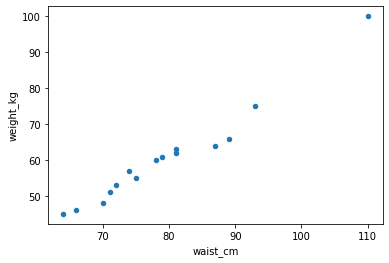

In [30]:
data.plot(kind='scatter',x='waist_cm',y='weight_kg')
plt.show()

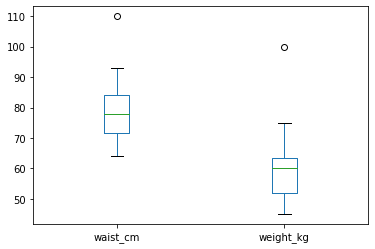

In [31]:
data.plot(kind='box')
plt.show()

In [32]:
data.corr() # Correlation Coefficients

,waist_cm,weight_kg
waist_cm,1.000000,0.981216
weight_kg,0.981216,1.000000


In [33]:
# change to dataframe variables
waist=pd.DataFrame(data['waist_cm'])
weight=pd.DataFrame(data['weight_kg'])

In [34]:
waist

,waist_cm
0,71
1,89
2,64
3,74
4,87
5,93
6,79
7,81
8,75
9,72


In [35]:
weight

,weight_kg
0,51
1,66
2,45
3,57
4,64
5,75
6,61
7,62
8,55
9,53


In [36]:
# Building Linear Regression model
lm=linear_model.LinearRegression()
model=lm.fit(waist,weight)

In [37]:
model.coef_

array([[1.13470708]])

In [38]:
model.intercept_

array([-29.62009537])

In [39]:
model.score(waist,weight) # Evaluating the model

0.9627843958606757

In [40]:
# Predict new value of weight
import numpy as np
waist_new=np.array([97])
waist_new=waist_new.reshape(-1,1)
weight_predict=model.predict(waist_new)
weight_predict

array([[80.44649183]])

In [41]:
# Predict more values
X=([67,78,94])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y],axis=1,keys=['waist_new_cm','weight_predicted_kg'])
df

,waist_new_cm,weight_predicted_kg
,0,0
0,67,46.405279
1,78,58.887057
2,94,77.042371


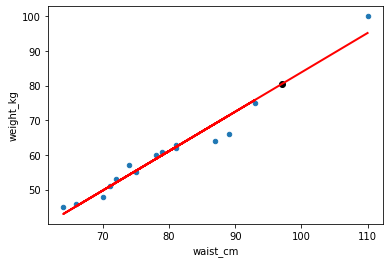

In [43]:
# Visualizing the Result
data.plot(kind='scatter',x='waist_cm',y='weight_kg')
#plotting the regression line
plt.plot(waist,model.predict(waist),color='red',linewidth=2)
#plotting the predict value
plt.scatter(waist_new,weight_predict,color='black')
# plt.plot(X,Y,color='blue',linewidth=5)
plt.show()